<a href="https://colab.research.google.com/github/Carocaro0424/Finanzas-Computacionales-105I/blob/main/TALLER_1__Paula_Andrea_Caro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Taller 1 

Nombres: Paula Andrea Caro y Santiago Rodriguez Valencia

curso: 105I

1. Escoja dos acciones de su preferencia en el mercado estadounidense. Para estas dos
acciones descargue las series de precios diarios para el periodo Ene-21 a Dic-2022 usando
pandas datareader. Con esta información: 

*   a. Calcule los retornos logarítmicos diarios, mensuales y anualizados. Presente los resultados en una tabla.
*   b. Calcule los retornos esperados y volatilidades anualizadas.
*   c. Construya una tabla resumen con las estadísticas descriptivas de las    series diarias (media, mediana, desv. estándar, curtosis, simetría) de los dos activos.
*   d. Compare las distribuciones empíricas de los dos activos con la distribución teórica normal.
*   e. Calcule la matriz de correlaciones de Pearson, rango de Kendall y de Spearman.
*   f. Implemente las pruebas de normalidad de Kolmogorov-Smirnov para todos los activos.






In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
!pip install --quiet yfinance
import yfinance as yf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 18.8 MB/s eta 0:00:00


Datos acciones amazon y meta con resultados diarios 

In [ ]:
from pandas_datareader import data as wb
from datetime import datetime

In [ ]:
yf.pdr_override()

INFORMACIÓN DE LAS ACCIONES

In [ ]:
#Descarga de datos de AMAZON, valor de cierre
df_amazon = wb.get_data_yahoo(['AMZN'], start=("2021-01-01"), end=("2022-12-31"))['Adj Close']

#Descarga de datos de META, valor de cierre
df_meta = wb.get_data_yahoo(['META'], start=("2021-01-01"), end=("2022-12-31"))['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Retornos diarios, mensuales y anualizados

In [ ]:
activos = ["AMZN", "META"]
precios_diarios =wb.get_data_yahoo(activos,start="2021-01-01",end="2022-12-31")["Adj Close"] 
retornos_diarios = np.log(precios_diarios/precios_diarios.shift(1)).dropna()
retornos_diarios.head()


[*********************100%***********************]  2 of 2 completed


,AMZN,META
Date,,
2021-01-05,0.009955,0.007520
2021-01-06,-0.025212,-0.028676
2021-01-07,0.007549,0.020412
2021-01-08,0.006475,-0.004363
2021-01-11,-0.021754,-0.040928


In [ ]:
retornos_diarios.mean()*21

AMZN   -0.02678
META   -0.03364
dtype: float64

In [ ]:
retornos_diarios.mean()*252

AMZN   -0.321360
META   -0.403686
dtype: float64

Retornos volatibilidades diarios, mensuales y anualizados

In [ ]:
retornos_diarios.std()

AMZN    0.024795
META    0.032776
dtype: float64

In [ ]:
retornos_diarios.std()*np.sqrt(21)

AMZN    0.113624
META    0.150197
dtype: float64

In [ ]:
retornos_diarios.std()*np.sqrt(252)

AMZN    0.393604
META    0.520298
dtype: float64

Estadistica descriptiva 

In [ ]:
pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tabulate import tabulate
mydata = [
    ["Mediana", retornos_diarios["AMZN"].median(),retornos_diarios["META"].median()],
    ["Media", retornos_diarios["AMZN"].mean(),retornos_diarios["META"].mean()],
    ["Desviacion estandar", retornos_diarios["AMZN"].std(),retornos_diarios["META"].std()],
      ["Curtosis",retornos_diarios["AMZN"].kurtosis(),retornos_diarios["META"].kurtosis() ]
]
head = ["Estadistica descriptiva", "Amazon","META"]
print(tabulate(mydata, headers=head, tablefmt ="grid"))



+---------------------------+--------------+--------------+
| Estadistica descriptiva   |       Amazon |         META |
+===========================+==============+==============+
| Mediana                   | -0.000389199 | -0.000310158 |
+---------------------------+--------------+--------------+
| Media                     | -0.00127524  | -0.00160193  |
+---------------------------+--------------+--------------+
| Desviacion estandar       |  0.0247947   |  0.0327757   |
+---------------------------+--------------+--------------+
| Curtosis                  |  5.29844     | 25.7599      |
+---------------------------+--------------+--------------+


Distribuciones empíricas de los dos activos con la distribución teórica normal.

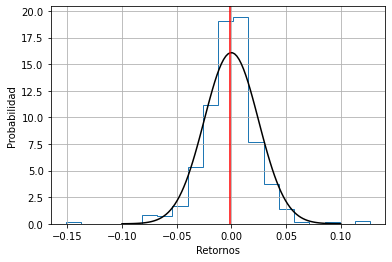

In [ ]:
from scipy.stats import norm
retornos_diarios['AMZN'].hist(bins=20,density=True,histtype="step")
x = np.linspace(-0.1,0.1,num=100)
sigma=retornos_diarios['AMZN'].std()
plt.plot(x,norm.pdf(x,scale=sigma),"k")
plt.axvline(retornos_diarios['AMZN'].mean(),color="r");
plt.xlabel("Retornos")
plt.ylabel("Probabilidad");


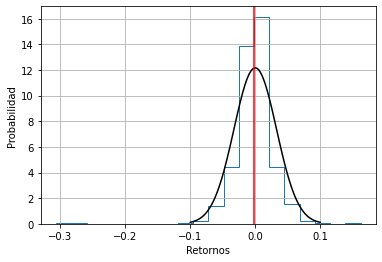

In [ ]:
from scipy.stats import norm
retornos_diarios['META'].hist(bins=20,density=True,histtype="step")
x = np.linspace(-0.1,0.1,num=100)
sigma=retornos_diarios['META'].std()
plt.plot(x,norm.pdf(x,scale=sigma),"k")
plt.axvline(retornos_diarios['META'].mean(),color="r");
plt.xlabel("Retornos")
plt.ylabel("Probabilidad");

Correlación Pearson

In [ ]:
retornos_diarios['AMZN'].corr(retornos_diarios['META'],method="pearson")

0.5819657075684893

Correlación Kendall

In [ ]:
import scipy.stats as stats
stats.kendalltau(retornos_diarios['AMZN'], retornos_diarios['META'])

KendalltauResult(correlation=0.46751914497697833, pvalue=2.9387977153972924e-55)

In [ ]:
retornos_diarios['AMZN'].corr(retornos_diarios['META'], method='kendall')

0.46751914497697833

Correlación Spearman

In [ ]:
stats.spearmanr(retornos_diarios['AMZN'], retornos_diarios['META'])

SpearmanrResult(correlation=0.6299214043695458, pvalue=7.358745418346257e-57)

In [ ]:
retornos_diarios['AMZN'].corr(retornos_diarios['META'], method='spearman')

0.6299214043695458

**PUNTO 2**

Escoja 10 acciones de su preferencia en el mercado estadounidense. Para estas
acciones descargue las series de precios mensuales para el periodo Dic-17 a Dic-2022.

In [ ]:
activos = ["MCO", "F","AAPL","DIS","MSFT","BRK-B","SBUX","AXP","VZ","KO"]
precios_mensuales =wb.get_data_yahoo(activos,start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"] 
retornos_mensuales= np.log(precios_mensuales/precios_mensuales.shift(1)).dropna()
retornos_mensuales.head()

[*********************100%***********************]  10 of 10 completed


,AAPL,AXP,BRK-B,DIS,F,KO,MCO,MSFT,SBUX,VZ
Date,,,,,,,,,,
2018-01-01,-0.010694,0.000906,0.078373,0.018744,-0.129764,0.036594,0.091726,0.104998,-0.010854,0.021309
2018-02-01,0.061892,-0.015675,-0.034066,-0.052035,-0.009040,-0.096319,0.030976,-0.013137,0.005092,-0.113184
2018-03-01,-0.055735,-0.044349,-0.037971,-0.026721,0.043345,0.004847,-0.031371,-0.022336,0.019150,0.001674
2018-04-01,-0.015134,0.056985,-0.029249,-0.001096,0.014337,0.003710,0.005564,0.024353,-0.005543,0.031494
2018-05-01,0.122893,-0.000820,-0.011421,-0.008609,0.040534,-0.004872,0.050316,0.055327,-0.015757,-0.022131


In [ ]:
retornos_mensuales_anualizados =retornos_mensuales.mean()*12

In [ ]:
retornos_mensuales.std()*np.sqrt(12)

AAPL     0.319091
AXP      0.291930
BRK-B    0.209831
DIS      0.321140
F        0.431608
KO       0.197600
MCO      0.270059
MSFT     0.212894
SBUX     0.266532
VZ       0.171293
dtype: float64

Tabla ranqueos de los activos

In [ ]:
retornos_mensuales_anualizados

AAPL     0.234476
AXP      0.093692
BRK-B    0.088728
DIS     -0.035433
F        0.023266
KO       0.097156
MCO      0.136221
MSFT     0.218191
SBUX     0.129678
VZ      -0.013389
dtype: float64

In [ ]:
df = pd.DataFrame(retornos_mensuales_anualizados, columns=["Retornos"])
df

,Retornos
AAPL,0.234476
AXP,0.093692
BRK-B,0.088728
DIS,-0.035433
F,0.023266
KO,0.097156
MCO,0.136221
MSFT,0.218191
SBUX,0.129678
VZ,-0.013389


In [ ]:
df.sort_values("Retornos")

,Retornos
DIS,-0.035433
VZ,-0.013389
F,0.023266
BRK-B,0.088728
AXP,0.093692
KO,0.097156
SBUX,0.129678
MCO,0.136221
MSFT,0.218191
AAPL,0.234476


**PUNTO 3**

In [ ]:
activos = ["^RUT"]
precios_mensuales_rusell =wb.get_data_yahoo(activos,start="2011-12-01",end="2022-12-31",interval="1Mo")["Adj Close"] 
retornos_rusell = np.log(precios_mensuales_rusell/precios_mensuales_rusell.shift(1)).dropna()
retornos_rusell.head()

[*********************100%***********************]  1 of 1 completed


Date
2012-01-01    0.067704
2012-02-01    0.022598
2012-03-01    0.023593
2012-04-01   -0.016295
2012-05-01   -0.069782
Name: Adj Close, dtype: float64

Desviacion estandar

In [ ]:
sigma = retornos_rusell.std()
sigma

0.05474479591479422

In [ ]:
sigma*np.sqrt(12)

0.18964153594882538

Parkinson

In [ ]:
activos = ["^RUT"]
precios_mensuales_rusell =wb.get_data_yahoo(activos,start="2011-12-01",end="2022-12-31",interval="1Mo")
retornos_rusell_completo = np.log(precios_mensuales_rusell/precios_mensuales_rusell.shift(1)).dropna()


[*********************100%***********************]  1 of 1 completed


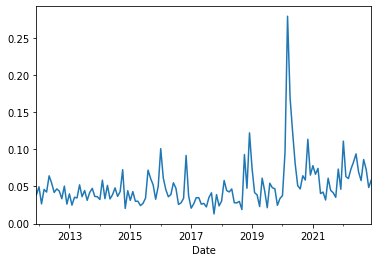

In [ ]:
lnHL = np.log(precios_mensuales_rusell["High"]/precios_mensuales_rusell["Low"]).dropna()
sigmaPark_d = ((1/(4*np.log(2)))*lnHL**2)**0.5
sigmaPark_d.plot()

In [ ]:
sigmaPark_d.mean()*np.sqrt(12)

0.1767113126308943

Garman-Klass

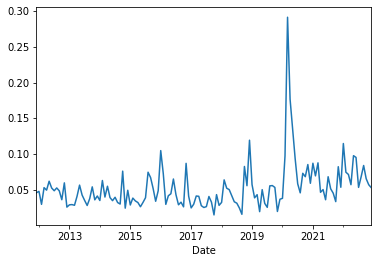

In [ ]:
lnHL = np.log(precios_mensuales_rusell["High"]/precios_mensuales_rusell["Low"]).dropna()
lnCO = np.log(precios_mensuales_rusell["Close"]/precios_mensuales_rusell["Open"]).dropna()
sigmaGK_d = (0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)**0.5
sigmaGK_d.plot()

In [ ]:
sigmaGK_d.mean()*np.sqrt(12)

0.1815139038491142

Volatilidad ponderada exponencial (EWMA) con una lambda de 0.94.

In [ ]:
activos = ["^RUT"]
precios_mensuales_rusell =wb.get_data_yahoo(activos,start="2011-12-01",end="2022-12-31",interval="1Mo")['Adj Close']
retornos_rusell = np.log(precios_mensuales_rusell/precios_mensuales_rusell.shift(1)).dropna()

[*********************100%***********************]  1 of 1 completed


In [ ]:
Lambda = 0.94 
k = len(retornos_rusell)
td = np.arange(k-1,-1,-1) #Contador que explica que la seria va decreciendo (Primer menos uno) y que se elimina un valor (Segundo menos uno) (Un K para cada T)
alpha = Lambda**td #Otra forma de calcularlo es con np.power(Lambda,td)
var_S = (retornos_rusell**2*alpha).sum()*(1-Lambda) #Varianza mensual (Promedio)
var_S 
vol_d = np.sqrt(var_S) #Volatilidad mensual
vol_d*np.sqrt(12) #Volatilidad Anualizada



0.23662477958980582

In [ ]:
def vol_ewma(retornos_rusell,Lambda):
  k = len(retornos_rusell)
  td = np.arange(k-1,-1,-1) 
  alpha = Lambda**td 
  var_S = retornos_rusell**2**alpha.sum()*(1-Lambda) 
  vol_d = np.sqrt(var_S)
  return(vol_d)